In [32]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [3]:
chromecast_df = pd.read_csv("dataset_chromecast.csv")
smart_tv_df = pd.read_csv("dataset_smart-tv.csv")

In [4]:
chromecast_df["bytes_up"] = chromecast_df.bytes_up.apply(lambda x: 0 if x == 0 else math.log(x, 10))
chromecast_df["bytes_down"] = chromecast_df.bytes_down.apply(lambda x: 0 if x == 0 else math.log(x, 10))
smart_tv_df["bytes_up"] = smart_tv_df.bytes_up.apply(lambda x: 0 if x == 0 else math.log(x, 10))
smart_tv_df["bytes_down"] = smart_tv_df.bytes_down.apply(lambda x: 0 if x == 0 else math.log(x, 10))

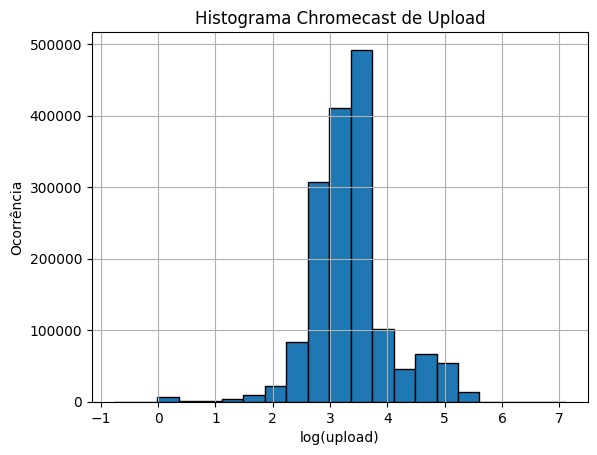

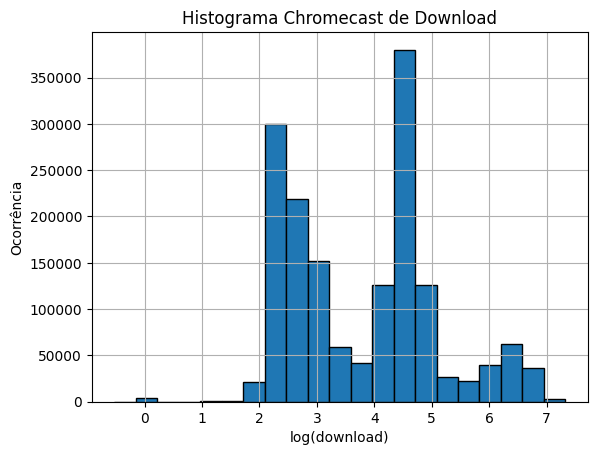

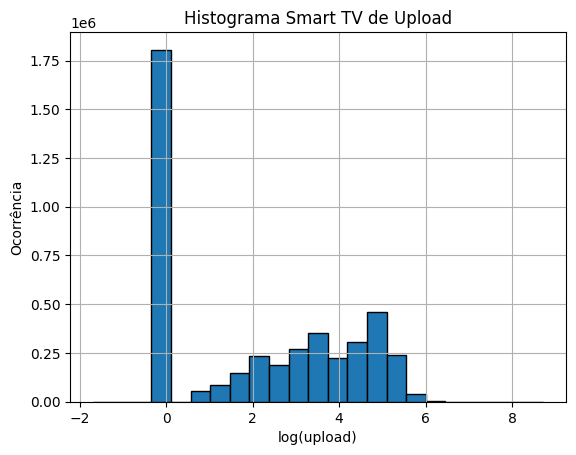

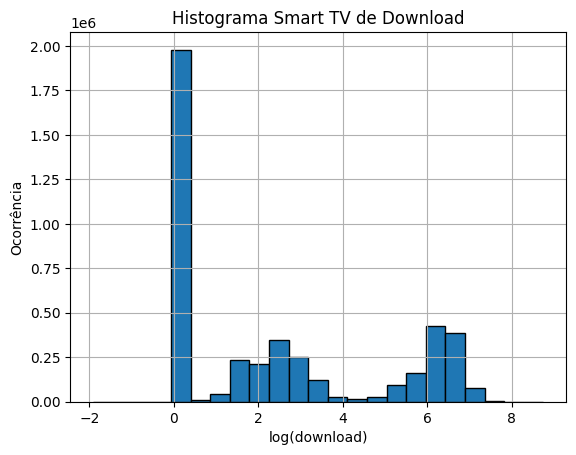

In [5]:
n = len(chromecast_df["bytes_up"])
m = round(1 +3.3*math.log(n, 10))
chromecast_df["bytes_up"].hist(bins=m, edgecolor = 'black')
plt.title("Histograma Chromecast de Upload")
plt.xlabel("log(upload)")
plt.ylabel("Ocorrência")
plt.show()

n = len(chromecast_df["bytes_down"])
m = round(1 +3.3*math.log(n, 10))
chromecast_df["bytes_down"].hist(bins=m, edgecolor = 'black')
plt.title("Histograma Chromecast de Download")
plt.xlabel("log(download)")
plt.ylabel("Ocorrência")
plt.show()

n = len(smart_tv_df["bytes_up"])
m = round(1 +3.3*math.log(n, 10))
smart_tv_df["bytes_up"].hist(bins=m, edgecolor = 'black')
plt.title("Histograma Smart TV de Upload")
plt.xlabel("log(upload)")
plt.ylabel("Ocorrência")
plt.show()

n = len(smart_tv_df["bytes_down"])
m = round(1 +3.3*math.log(n, 10))
smart_tv_df["bytes_down"].hist(bins=m, edgecolor = 'black')
plt.title("Histograma Smart TV de Download")
plt.xlabel("log(download)")
plt.ylabel("Ocorrência")
plt.show()

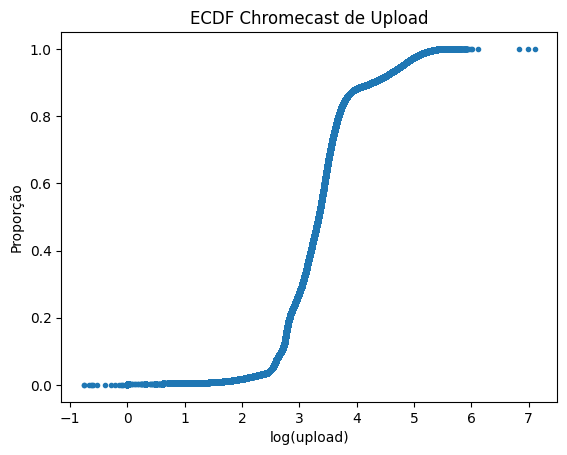

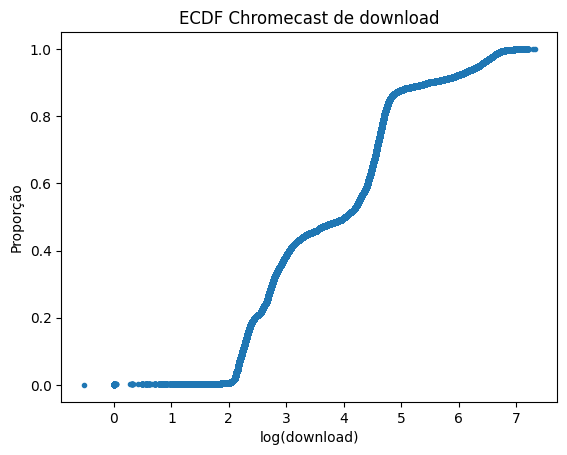

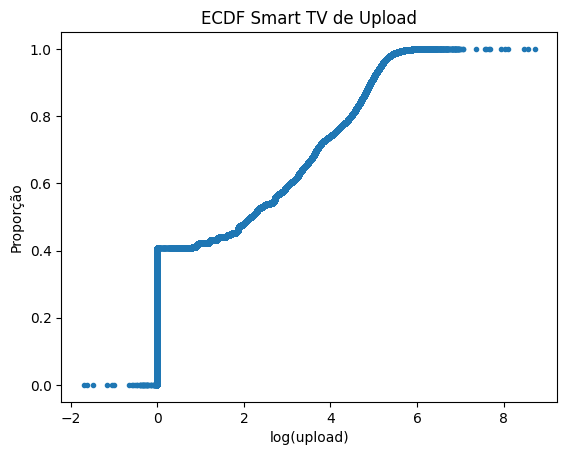

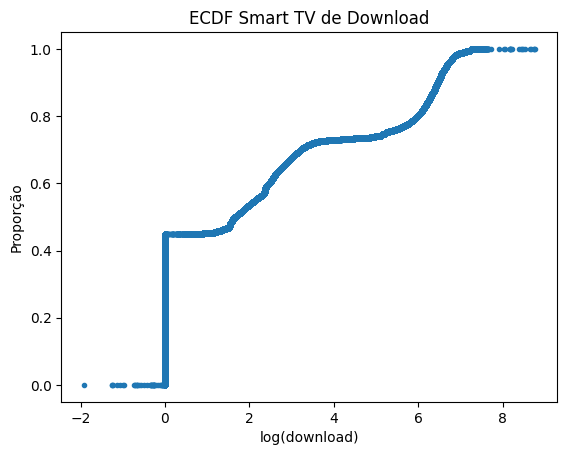

In [6]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n + 1) / n

    return x, y
x, y = ecdf(chromecast_df["bytes_up"])
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('log(upload)')
plt.ylabel('Proporção')
plt.title('ECDF Chromecast de Upload')
plt.show()

x, y = ecdf(chromecast_df["bytes_down"])
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('log(download)')
plt.ylabel('Proporção')
plt.title('ECDF Chromecast de download')
plt.show()

x, y = ecdf(smart_tv_df["bytes_up"])
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('log(upload)')
plt.ylabel('Proporção')
plt.title('ECDF Smart TV de Upload')
plt.show()

x, y = ecdf(smart_tv_df["bytes_down"])
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('log(download)')
plt.ylabel('Proporção')
plt.title('ECDF Smart TV de Download')
plt.show()


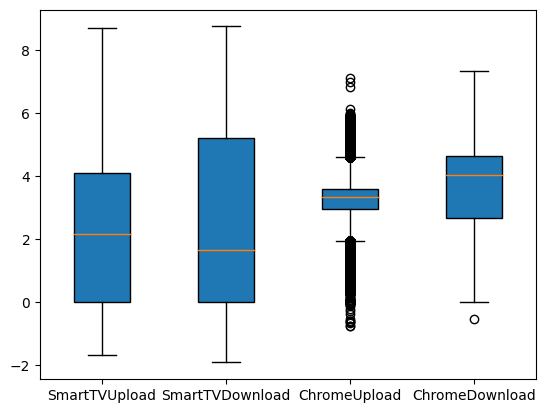

In [7]:
fig, ax = plt.subplots()

bp = ax.boxplot([smart_tv_df['bytes_up'], smart_tv_df['bytes_down'], 
                 chromecast_df['bytes_up'], chromecast_df['bytes_down']], patch_artist=True)

ax.set_xticklabels(['SmartTVUpload', 'SmartTVDownload', 'ChromeUpload','ChromeDownload'])

plt.show()

In [8]:
meanChromeUpload = chromecast_df["bytes_up"].mean()
meanChromeDownload = chromecast_df["bytes_down"].mean()
meanSmartUpload = smart_tv_df["bytes_up"].mean()
meanSmartDownload = smart_tv_df["bytes_down"].mean()

varianceChromeUpload = chromecast_df["bytes_up"].var()
varianceChromeDownload = chromecast_df["bytes_down"].var()
varianceSmartUpload = smart_tv_df["bytes_up"].var()
varianceSmartDownload = smart_tv_df["bytes_down"].var()

standardDevChromeUpload = chromecast_df["bytes_up"].std()
standardDevChromeDownload = chromecast_df["bytes_down"].std()
standardDevSmartUpload = smart_tv_df["bytes_up"].std()
standardDevSmartDownload = smart_tv_df["bytes_down"].std()

print("Chromecast")
print(f"A média de upload é {meanChromeUpload} e a de download é {meanChromeDownload};")
print(f"A variância de upload é {varianceChromeUpload} e a de download é {varianceChromeDownload};")
print(f"O desvio padrão de upload é {standardDevChromeUpload} e o de download é {standardDevChromeDownload}.\n")

print("Smart TV")
print(f"A média de upload é {meanSmartUpload} e a de download é {meanSmartDownload};")
print(f"A variância de upload é {varianceSmartUpload} e a de download é {varianceSmartDownload};")
print(f"O desvio padrão de upload é {standardDevSmartUpload} e o de download é {standardDevSmartDownload}.")

Chromecast
A média de upload é 3.3496717251158694 e a de download é 3.799335488086478;
A variância de upload é 0.46160016892790373 e a de download é 1.6659798143232258;
O desvio padrão de upload é 0.6794116343777928 e o de download é 1.2907284045542757.

Smart TV
A média de upload é 2.1565902037563727 e a de download é 2.3501726398959035;
A variância de upload é 4.113082752316163 e a de download é 6.723920763635552;
O desvio padrão de upload é 2.028073655545124 e o de download é 2.5930524027939645.


In [9]:
chromecast_df['date_hour'] = pd.to_datetime(chromecast_df['date_hour'])
chromecast_df = chromecast_df.set_index('date_hour')
groupedHourChrome = chromecast_df.groupby(chromecast_df.index.hour)

smart_tv_df['date_hour'] = pd.to_datetime(smart_tv_df['date_hour'])
smart_tv_df = smart_tv_df.set_index('date_hour')
groupedHourSmart = smart_tv_df.groupby(smart_tv_df.index.hour)

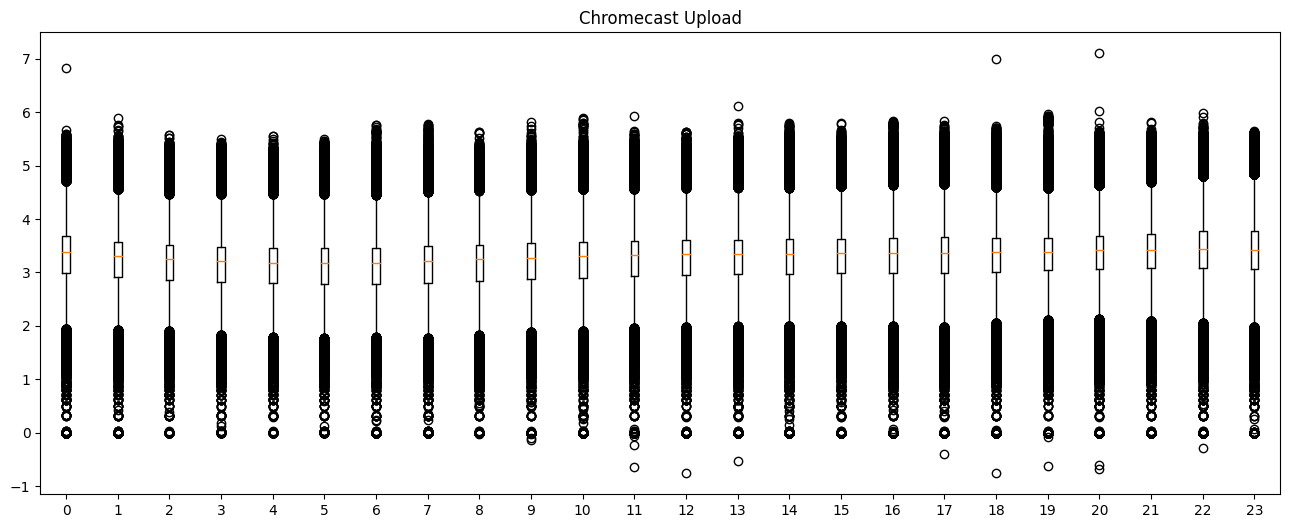

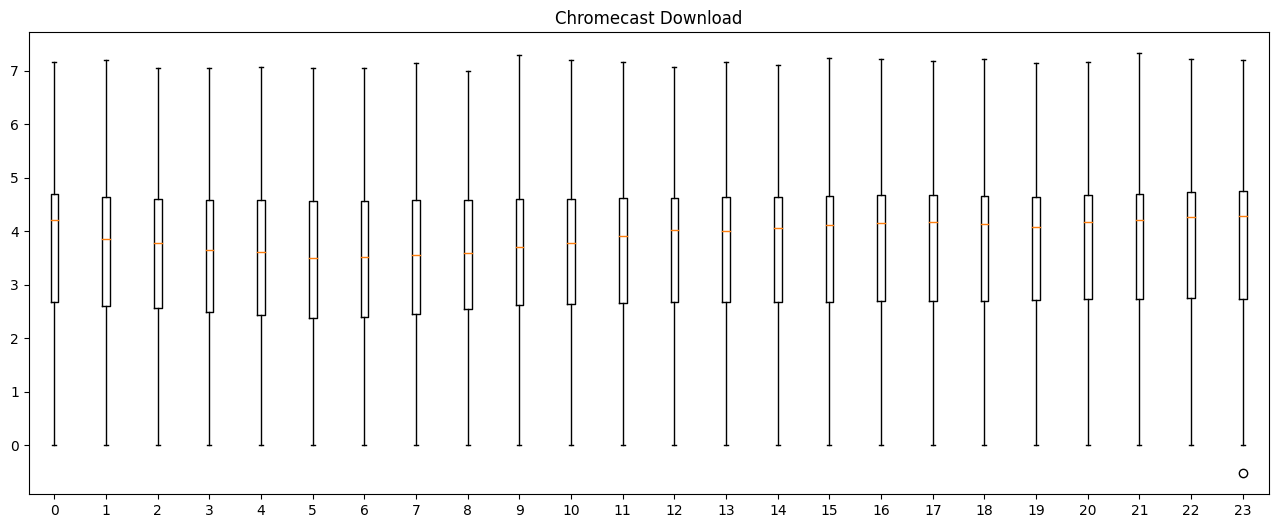

In [10]:

fig, ax = plt.subplots(figsize=(16, 6))
for i, (hour, group) in enumerate(groupedHourChrome):
    ax.boxplot(group['bytes_up'], positions=[i])

ax.set_xticks(range(len(groupedHourChrome)))
ax.set_title('Chromecast Upload')
plt.show()

fig, ax = plt.subplots(figsize=(16, 6))
for i, (hour, group) in enumerate(groupedHourChrome):
    ax.boxplot(group['bytes_down'], positions=[i])

ax.set_xticks(range(len(groupedHourChrome)))
ax.set_title('Chromecast Download')
plt.show()

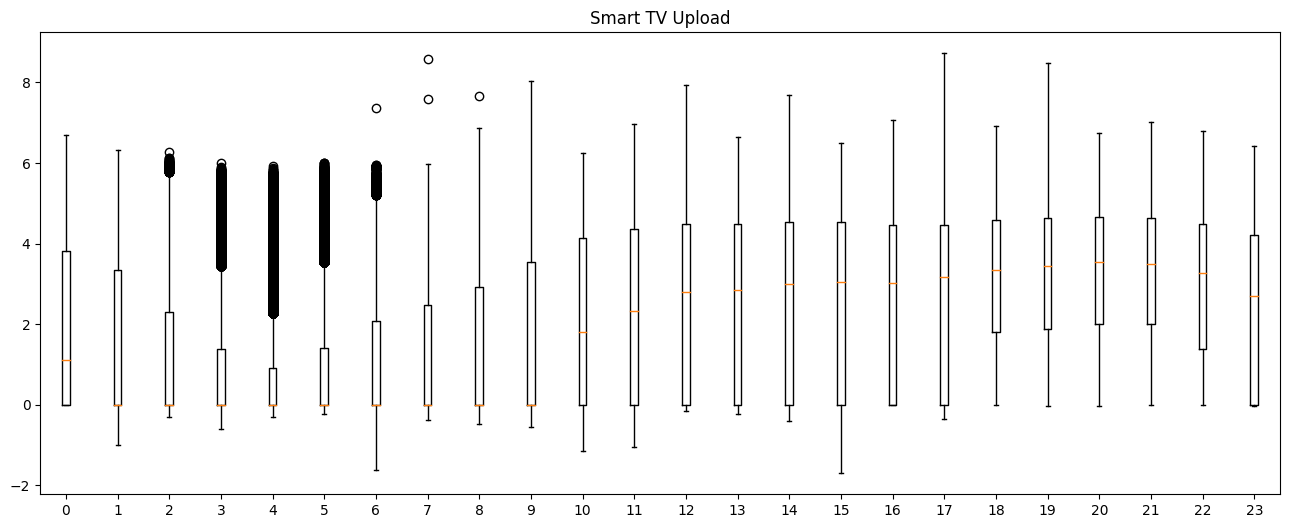

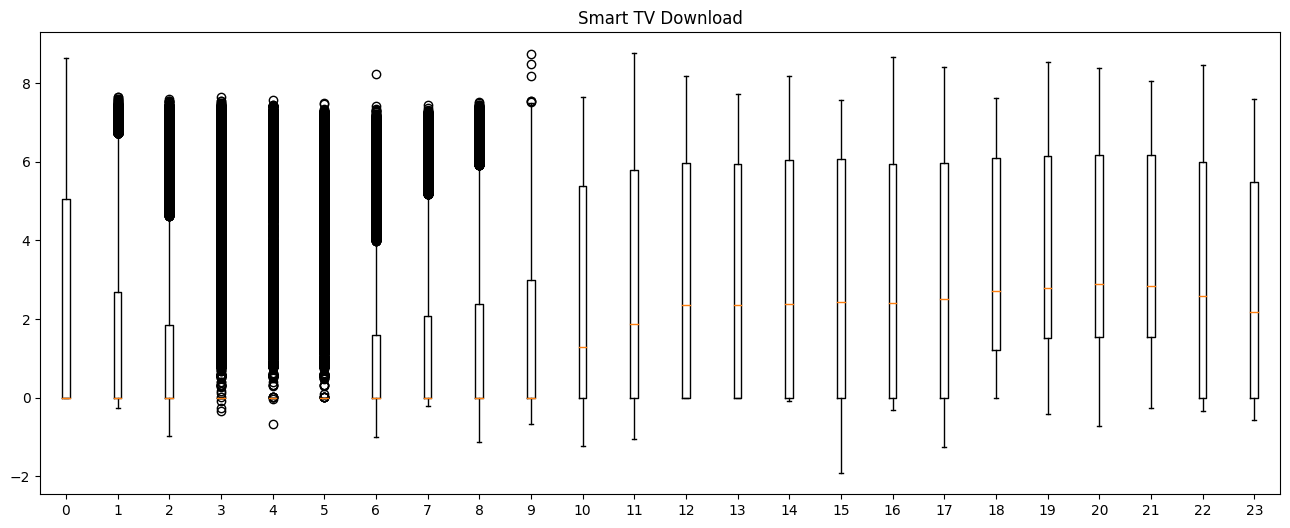

In [11]:
fig, ax = plt.subplots(figsize=(16, 6))
for i, (hour, group) in enumerate(groupedHourSmart):
    ax.boxplot(group['bytes_up'], positions=[i])

ax.set_xticks(range(len(groupedHourSmart)))
ax.set_title('Smart TV Upload')
plt.show()

fig, ax = plt.subplots(figsize=(16, 6))
for i, (hour, group) in enumerate(groupedHourSmart):
    ax.boxplot(group['bytes_down'], positions=[i])

ax.set_xticks(range(len(groupedHourChrome)))
ax.set_title('Smart TV Download')
plt.show()

In [12]:
meanHourlyChrome = groupedHourChrome.mean()
varianceHourlyChrome = groupedHourChrome.var()
standardDevHourlyChrome = groupedHourChrome.std()

meanHourlySmart = groupedHourSmart.mean()
varianceHourlySmart = groupedHourSmart.var()
standardDevHourlySmart = groupedHourSmart.std()

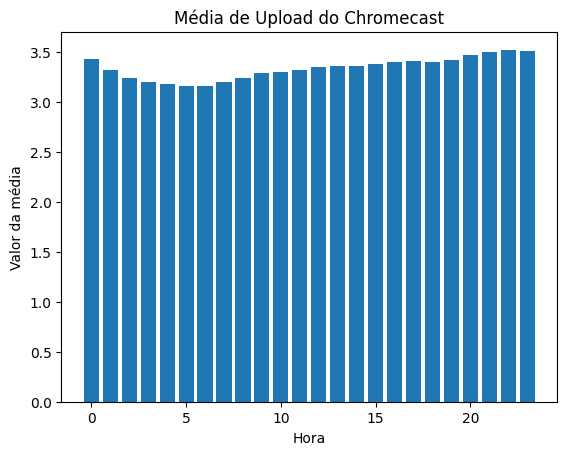

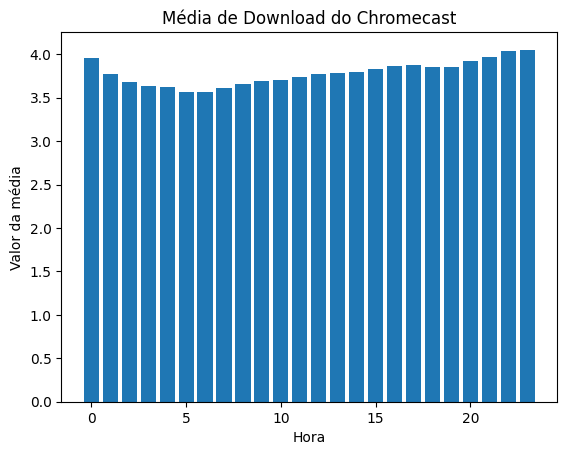

In [13]:
plt.bar(range(24), meanHourlyChrome['bytes_up'])
plt.title("Média de Upload do Chromecast")
plt.xlabel("Hora")
plt.ylabel("Valor da média")
plt.show()
plt.bar(range(24), meanHourlyChrome['bytes_down'])
plt.title("Média de Download do Chromecast")
plt.xlabel("Hora")
plt.ylabel("Valor da média")
plt.show()


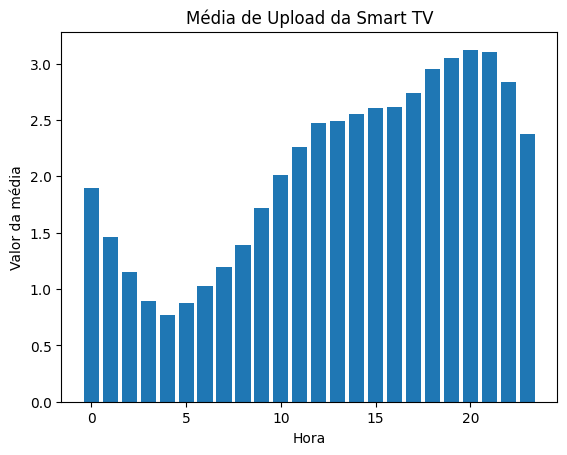

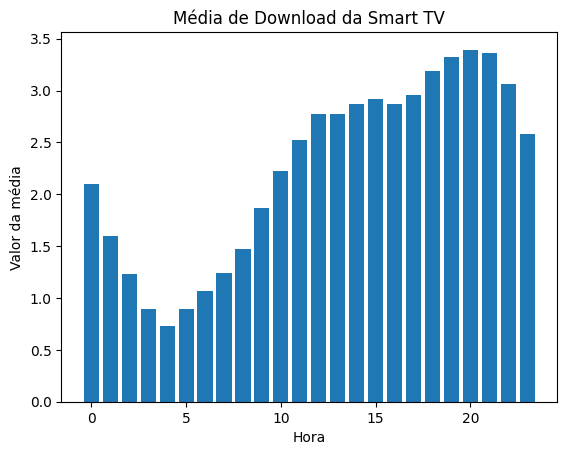

In [14]:
plt.bar(range(24), meanHourlySmart['bytes_up'])
plt.title("Média de Upload da Smart TV")
plt.xlabel("Hora")
plt.ylabel("Valor da média")
plt.show()
plt.bar(range(24), meanHourlySmart['bytes_down'])
plt.title("Média de Download da Smart TV")
plt.xlabel("Hora")
plt.ylabel("Valor da média")
plt.show()


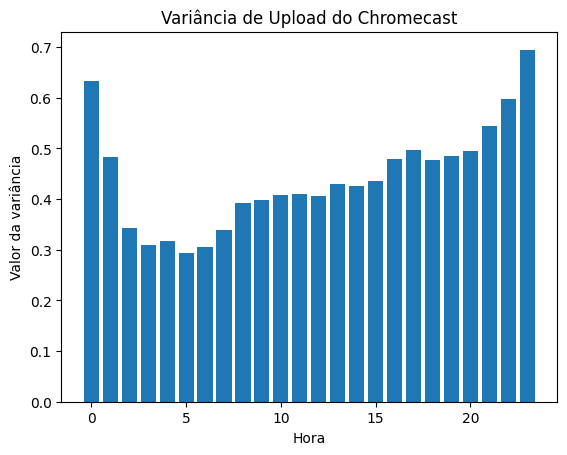

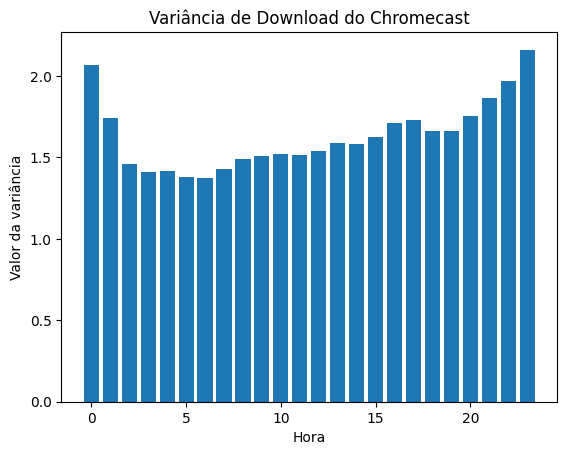

In [15]:
plt.bar(range(24), varianceHourlyChrome['bytes_up'])
plt.title("Variância de Upload do Chromecast")
plt.xlabel("Hora")
plt.ylabel("Valor da variância")
plt.show()
plt.bar(range(24), varianceHourlyChrome['bytes_down'])
plt.title("Variância de Download do Chromecast")
plt.xlabel("Hora")
plt.ylabel("Valor da variância")
plt.show()

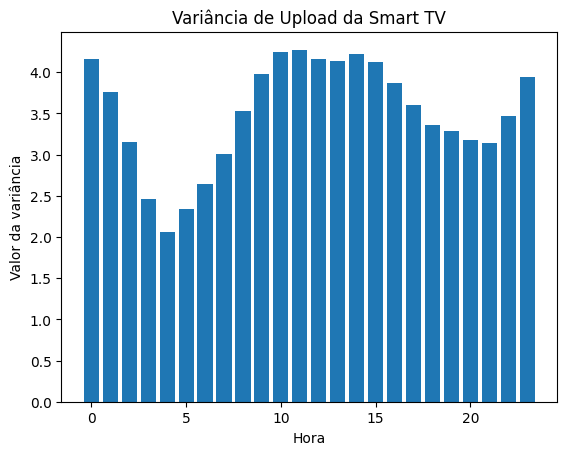

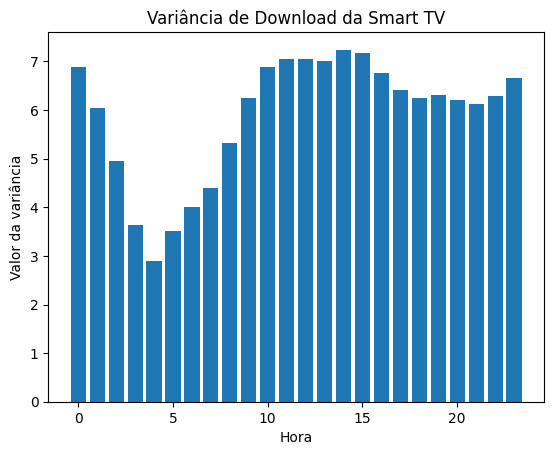

In [16]:
plt.bar(range(24), varianceHourlySmart['bytes_up'])
plt.title("Variância de Upload da Smart TV")
plt.xlabel("Hora")
plt.ylabel("Valor da variância")
plt.show()
plt.bar(range(24), varianceHourlySmart['bytes_down'])
plt.title("Variância de Download da Smart TV")
plt.xlabel("Hora")
plt.ylabel("Valor da variância")
plt.show()

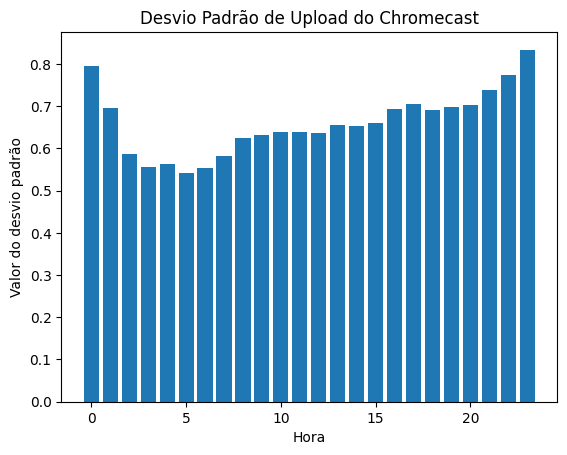

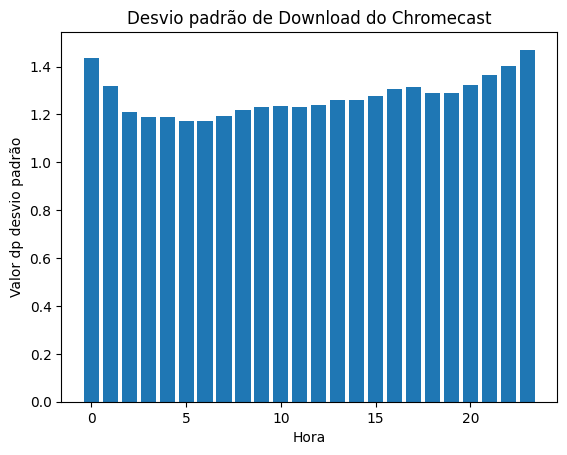

In [17]:
plt.bar(range(24), standardDevHourlyChrome['bytes_up'])
plt.title("Desvio Padrão de Upload do Chromecast")
plt.xlabel("Hora")
plt.ylabel("Valor do desvio padrão")
plt.show()
plt.bar(range(24), standardDevHourlyChrome['bytes_down'])
plt.title("Desvio padrão de Download do Chromecast")
plt.xlabel("Hora")
plt.ylabel("Valor dp desvio padrão")
plt.show()

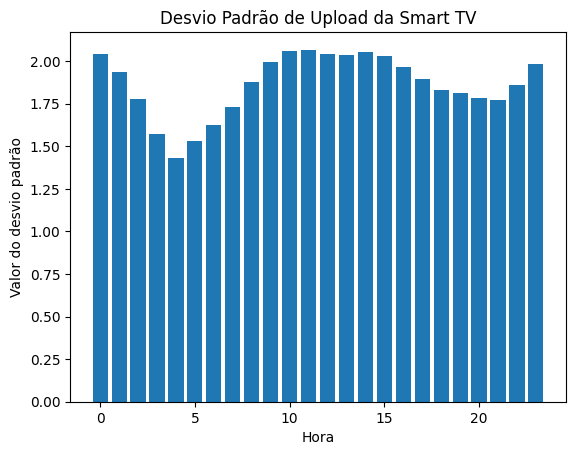

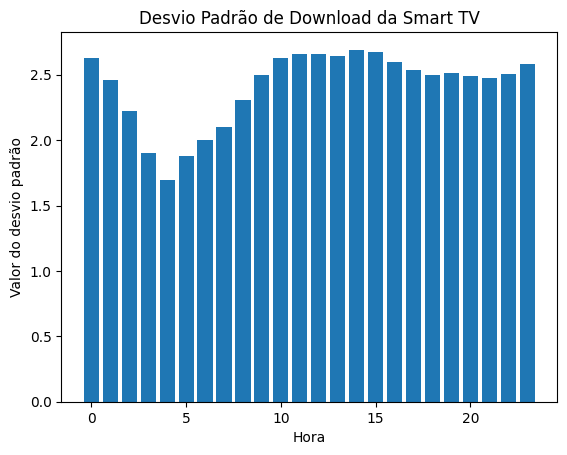

In [18]:
plt.bar(range(24), standardDevHourlySmart['bytes_up'])
plt.title("Desvio Padrão de Upload da Smart TV")
plt.xlabel("Hora")
plt.ylabel("Valor do desvio padrão")
plt.show()
plt.bar(range(24), standardDevHourlySmart['bytes_down'])
plt.title("Desvio Padrão de Download da Smart TV")
plt.xlabel("Hora")
plt.ylabel("Valor do desvio padrão")
plt.show()

In [52]:
print(meanHourlySmart.idxmax())
print(meanHourlyChrome.idxmax())
maxHourSmart = groupedHourSmart.get_group(20)
maxHourChrome = groupedHourChrome.get_group(23)

device_id     14
bytes_up      20
bytes_down    20
dtype: int32
device_id     10
bytes_up      22
bytes_down    23
dtype: int32


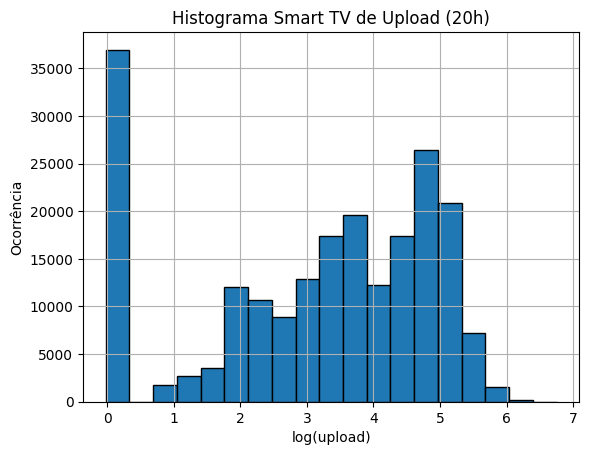

In [53]:
n = len(maxHourSmart["bytes_up"])
m = round(1 + 3.3*math.log(n, 10))
maxHourSmart["bytes_up"].hist(bins=m, edgecolor = 'black')
plt.title("Histograma Smart TV de Upload (20h)")
plt.xlabel("log(upload)")
plt.ylabel("Ocorrência")
plt.show()

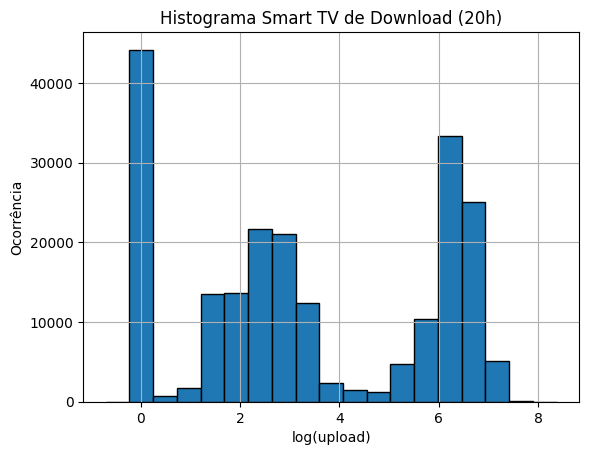

In [54]:
n = len(maxHourSmart["bytes_down"])
m = round(1 + 3.3*math.log(n, 10))
maxHourSmart["bytes_down"].hist(bins=m, edgecolor = 'black')
plt.title("Histograma Smart TV de Download (20h)")
plt.xlabel("log(upload)")
plt.ylabel("Ocorrência")
plt.show()

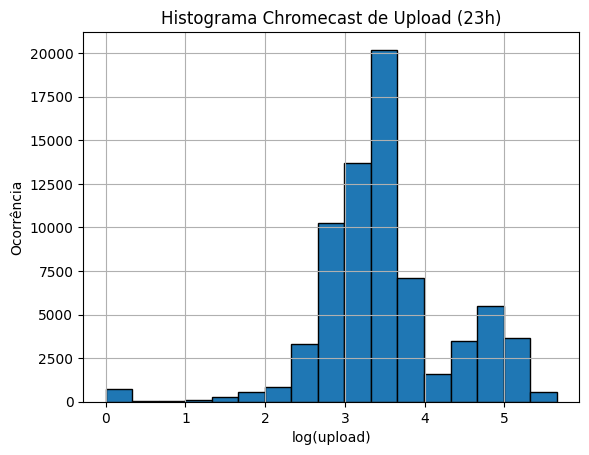

In [55]:
n = len(maxHourChrome["bytes_up"])
m = round(1 + 3.3*math.log(n, 10))
maxHourChrome["bytes_up"].hist(bins=m, edgecolor = 'black')
plt.title("Histograma Chromecast de Upload (23h)")
plt.xlabel("log(upload)")
plt.ylabel("Ocorrência")
plt.show()

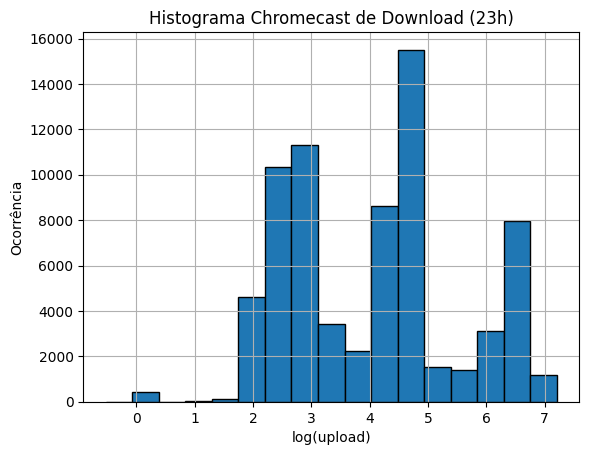

In [56]:
n = len(maxHourChrome["bytes_down"])
m = round(1 + 3.3*math.log(n, 10))
maxHourChrome["bytes_down"].hist(bins=m, edgecolor = 'black')
plt.title("Histograma Chromecast de Download (23h)")
plt.xlabel("log(upload)")
plt.ylabel("Ocorrência")
plt.show()

Text(0.5, 1.0, 'QQ plot de upload')

<Figure size 640x480 with 0 Axes>

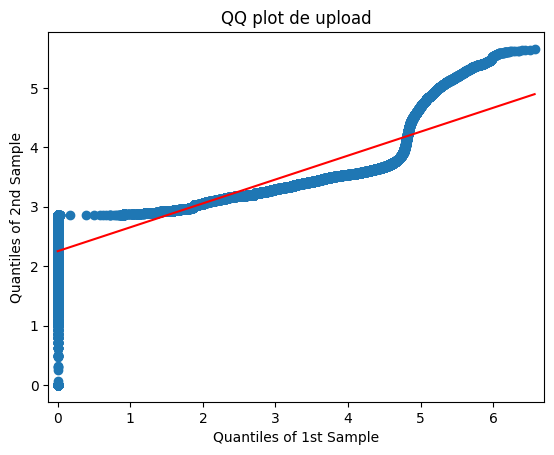

In [60]:
plt.figure()
sm.qqplot_2samples(maxHourSmart["bytes_up"], maxHourChrome["bytes_up"], line = 'r')
plt.title('QQ plot de upload')

Text(0.5, 1.0, 'QQ plot de download')

<Figure size 640x480 with 0 Axes>

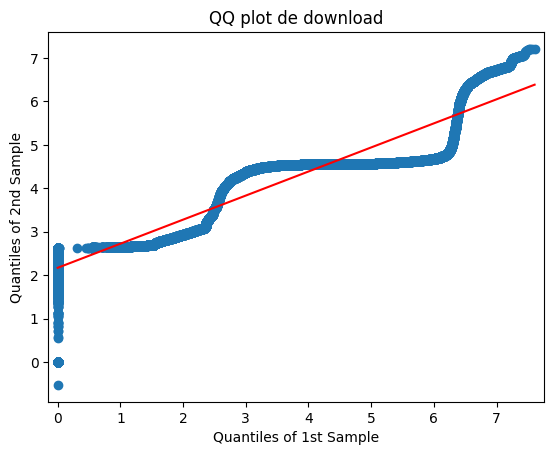

In [61]:
plt.figure()
sm.qqplot_2samples(maxHourSmart["bytes_down"], maxHourChrome["bytes_down"], line = 'r')
plt.title('QQ plot de download')

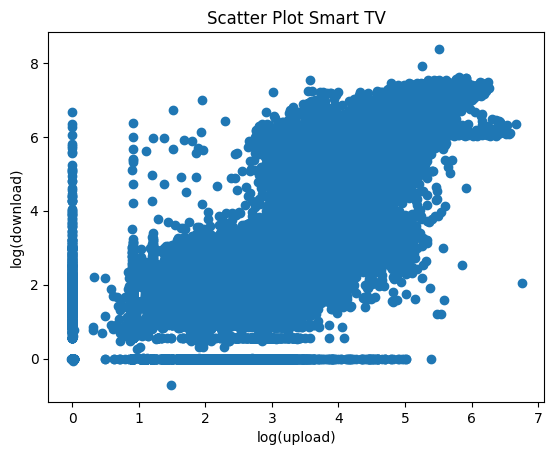

0.9154767447398767


In [64]:
plt.figure()
plt.scatter(maxHourSmart["bytes_up"], maxHourSmart["bytes_down"])
plt.title('Scatter Plot Smart TV')
plt.xlabel('log(upload)')
plt.ylabel('log(download)')
plt.show()
print(maxHourSmart["bytes_up"].corr(maxHourSmart["bytes_down"]))

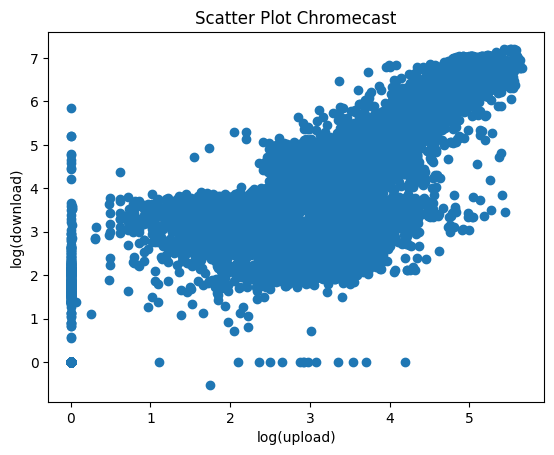

0.7919586388345036


In [65]:
plt.figure()
plt.scatter(maxHourChrome["bytes_up"], maxHourChrome["bytes_down"])
plt.title('Scatter Plot Chromecast')
plt.xlabel('log(upload)')
plt.ylabel('log(download)')
plt.show()
print(maxHourChrome["bytes_up"].corr(maxHourChrome["bytes_down"]))